<a href="https://colab.research.google.com/github/Amanya-Brian/mlzoomcamp/blob/main/price_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAR PRICE PREDICTION PROJECT**

# 1. Data Preparation

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# download data file
!wget https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv

--2024-09-18 07:05:00--  https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data.csv.1’

data.csv.1              [ <=>                ]   1.63M  --.-KB/s    in 0.02s   

2024-09-18 07:05:01 (105 MB/s) - ‘data.csv.1’ saved [1711672]



In [16]:
df = pd.read_csv('/content/data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [17]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [18]:
# change the values in the string columns to lower case and replace spaces with _
# get the string columns
df.dtypes == 'object'
# get the index of the dataset
df.dtypes[df.dtypes == 'object'].index
# convert into a list
columns = list(df.dtypes[df.dtypes == 'object'].index)
columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [19]:
# convert the strings to lower
for col in columns:
  df[col] = df[col].str.lower().str.replace(' ','_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2. Exploratory Data Analysis

In [22]:
# Check the values in each column
for col in df.columns:
  print("Column name: {}".format(col))
  print("First 7 unique values in the column: {}".format(df[col].unique()[:7]))
  print(df[col].nunique())
  print()

Column name: make
First 7 unique values in the column: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo']
48

Column name: model
First 7 unique values in the column: ['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200']
914

Column name: year
First 7 unique values in the column: [2011 2012 2013 1992 1993 1994 2017]
28

Column name: engine_fuel_type
First 7 unique values in the column: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'
 'electric' 'flex-fuel_(premium_unleaded_recommended/e85)']
10

Column name: engine_hp
First 7 unique values in the column: [335. 300. 230. 320. 172. 160. 130.]
356

Column name: engine_cylinders
First 7 unique values in the column: [ 6.  4.  5.  8. 12.  0. nan]
9

Column name: transmission_type
First 7 unique values in the column: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

Column name: driven_wheels
First 7 unique values in t

#### Visualizing prices

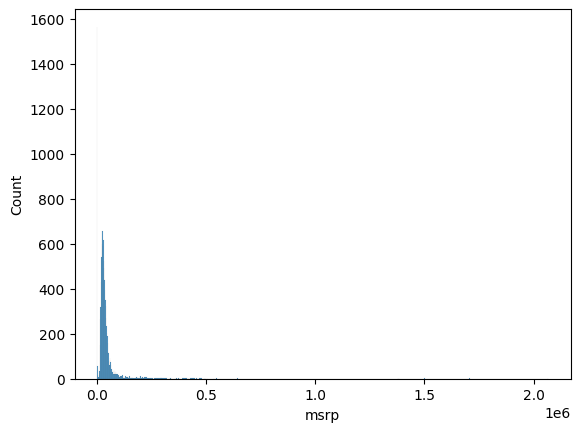

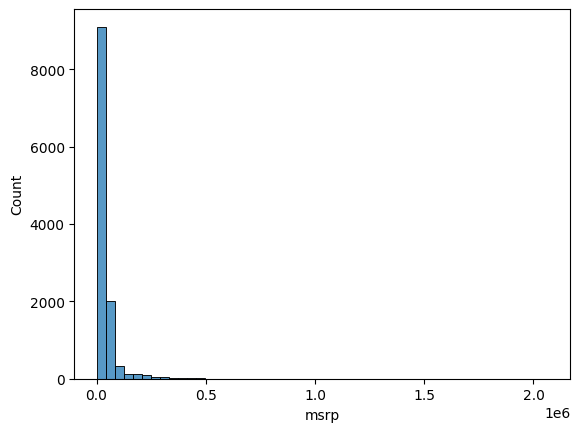

In [27]:
# histogram to visualize price distribution
sns.histplot(df.msrp)
plt.show()

# too small so we use bins to reduce the bars on the plot, hence zooming
sns.histplot(df.msrp, bins=50)
plt.show()

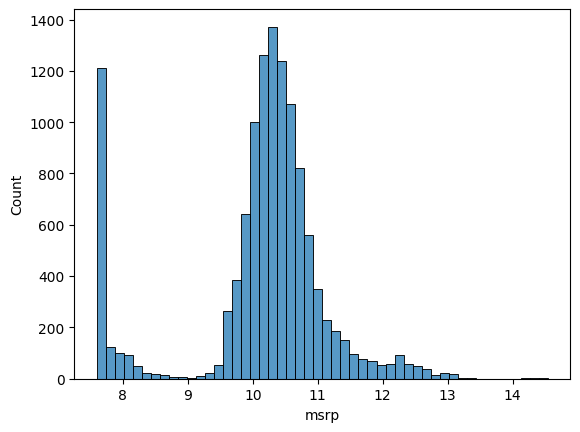

In [29]:
# the above plot shows a tail distribution of prices so we apply log
# log1p adds 1 to each value to avoid getting log(0) which does not exist
log_prices = np.log1p(df.msrp)
sns.histplot(log_prices, bins=50)
plt.show()

In [30]:
# That now follows a normal distribution which can be used to train the model
# However, we need to consider the missing values
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


## Setting up the validation framework